In [3]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)


In [ ]:
#classifying Reuters newswires into 46 mutually exclusive topics, each data point in its own category. (multilabel, multiclass classification problem)
#text classification 
#10,000 most frequently used words found in data

In [4]:
len(train_data)

8982

In [5]:
len(test_data)

2246

In [6]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
#decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in

train_data[0]]) #Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

In [8]:
#integer between 0 and 45
train_labels[10]

3

In [9]:
#Encoding data(vectorize)
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. 
    return results
    
x_train = vectorize_sequences(train_data) #vectorize train
x_test = vectorize_sequences(test_data) #vectorize test

In [10]:
#Catergorical encoding (embedding each label as an all-zero vector with a 1 in the place of the label index)
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
         results[i, label] = 1. 
    return results
    
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
#Vectorized training labels Vectorized test labels

In [11]:
#build in way to catergorical encoding for Keras 
from keras.utils.np_utils import to_categorical
        
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [12]:
#Building Network (Classifying short snippets of text with 46 output classes) meaning larger dimensionality output space 
#potential info bottleneck with 16 so we use 64 units

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

#46 dimensional vector at the end with softmax activation (probability distrbution over 46 differnt output classes)
#output [i] is probability that the sample belongs to class i. the 46 scores will sum to 1

In [13]:
#categorical_crossentropy is measuring distance between probability distrbution output by network and the true distribution of the labels
#minimizing will train network to output something as close as possible to true labels

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
#Lets set aside our 1000 samples in training data for validation set 

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
#Train the model 

history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 329us/step - loss: 2.5987 - accuracy: 0.4900 - val_loss: 1.7153 - val_accuracy: 0.6380
Epoch 2/20
7982/7982 [==============================] - 1s 188us/step - loss: 1.3951 - accuracy: 0.7056 - val_loss: 1.2793 - val_accuracy: 0.7150
Epoch 3/20
7982/7982 [==============================] - 1s 170us/step - loss: 1.0214 - accuracy: 0.7767 - val_loss: 1.1039 - val_accuracy: 0.7690
Epoch 4/20
7982/7982 [==============================] - 2s 214us/step - loss: 0.7998 - accuracy: 0.8305 - val_loss: 1.0128 - val_accuracy: 0.7860
Epoch 5/20
7982/7982 [==============================] - 1s 177us/step - loss: 0.6339 - accuracy: 0.8643 - val_loss: 0.9547 - val_accuracy: 0.8000
Epoch 6/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.5072 - accuracy: 0.8925 - val_loss: 0.9209 - val_accuracy: 0.8100
Epoch 7/20
7982/7982 [==============================] - 1s 153us/step - loss

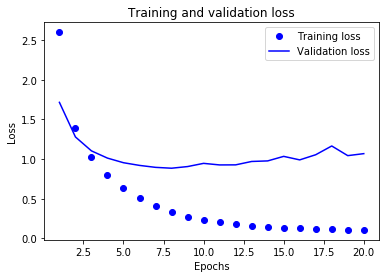

In [18]:
#Display loss and accuracy curves using matplotlib

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

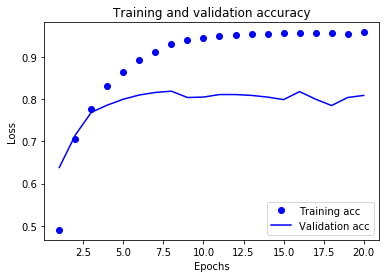

In [17]:
#Plotting the training and validation accuracy

plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

- The network begins to overfit after nine epochs. Let’s train a new network from scratch for nine epochs and then evaluate it on the test set.

In [23]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 232us/step - loss: 2.7407 - accuracy: 0.5460 - val_loss: 1.8234 - val_accuracy: 0.6390
Epoch 2/9
7982/7982 [==============================] - 1s 162us/step - loss: 1.4511 - accuracy: 0.7093 - val_loss: 1.3086 - val_accuracy: 0.7240
Epoch 3/9
7982/7982 [==============================] - 1s 142us/step - loss: 1.0510 - accuracy: 0.7830 - val_loss: 1.1824 - val_accuracy: 0.7430
Epoch 4/9
7982/7982 [==============================] - 2s 205us/step - loss: 0.8349 - accuracy: 0.8274 - val_loss: 1.0406 - val_accuracy: 0.7720
Epoch 5/9
7982/7982 [==============================] - 1s 164us/step - loss: 0.6625 - accuracy: 0.8649 - val_loss: 0.9661 - val_accuracy: 0.8010
Epoch 6/9
7982/7982 [==============================] - 1s 168us/step - loss: 0.5347 - accuracy: 0.8903 - val_loss: 0.9258 - val_accuracy: 0.8080
Epoch 7/9
7982/7982 [==============================] - 1s 155us/step - loss: 0.436

In [24]:
 results

[0.9763554857972468, 0.7885128855705261]

In [25]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy) 
float(np.sum(hits_array)) / len(test_labels)


0.19100623330365094

In [26]:
#Generating predictions for new data on all 46 topics for all of the test data
predictions = model.predict(x_test)

In [27]:
predictions[0].shape

(46,)

In [28]:
#Coefficients in this vector sum to 1
np.sum(predictions[0])

0.9999999

In [29]:
#The largest entry is the predicted class the class with the highest probability  
np.argmax(predictions[0])

3

In [30]:
#Encode labels by casting them as integer tensor 

y_train = np.array(train_labels)
y_test = np.array(test_labels)


In [31]:
#Change loss function for integer labels using sparse_categorical_crossentropy (same as other but different interface)

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [32]:
#Lets try a 4 dimensional intermediate layer rather than 46 to creat an information bottleneck 

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 368us/step - loss: 2.9615 - accuracy: 0.3924 - val_loss: 2.3983 - val_accuracy: 0.4190
Epoch 2/20
7982/7982 [==============================] - 2s 191us/step - loss: 2.0695 - accuracy: 0.4546 - val_loss: 1.8623 - val_accuracy: 0.4630
Epoch 3/20
7982/7982 [==============================] - 2s 206us/step - loss: 1.5028 - accuracy: 0.6146 - val_loss: 1.4719 - val_accuracy: 0.6690
Epoch 4/20
7982/7982 [==============================] - 1s 170us/step - loss: 1.2248 - accuracy: 0.7149 - val_loss: 1.3759 - val_accuracy: 0.6810
Epoch 5/20
7982/7982 [==============================] - 1s 181us/step - loss: 1.0802 - accuracy: 0.7405 - val_loss: 1.3163 - val_accuracy: 0.7050
Epoch 6/20
7982/7982 [==============================] - 1s 187us/step - loss: 0.9763 - accuracy: 0.7642 - val_loss: 1.2814 - val_accuracy: 0.7120
Epoch 7/20
7982/7982 [==============================] - 2s 202us/step - loss

In [33]:
#drop in validation accuracy because attempting to compress more info into an intermeidate space that is too low dimensional.

- Try using larger or smaller layers: 32 units, 128 units, and so on.
- You used two hidden layers. Now try using a single hidden layer, or three hid-
den layers.

- takeways: classification of data points for N classes is the same as a dense layer for size N at end of network 

- In single-label , multiclass classifcation problem End with softmax activation so it will output a probability distribution over the N output classes


- Categorical crossentropy is almost always the loss function you should use for such problems because of minimzation for distance
between prob dist output by network and true dist of the targets.


- There are two ways to handle labels in multiclass classification:
- Encoding the labels via categorical encoding (also known as one-hot encod-
ing) and using categorical_crossentropy as a loss function
- Encoding the labels as integers and using the sparse_categorical_crossentropy
loss function
- If you need to classify data into a large number of categories, you should avoid
creating information bottlenecks in your network due to intermediate layers that are too small.